In [98]:
import pandas as pd
import numpy as np

In [99]:
train  = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')
submission['PassengerId'] = test['PassengerId']

In [101]:
del train['PassengerId']
del test['PassengerId']

In [102]:
del train['Name']
del test['Name']

In [103]:
display(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [104]:
mode_value = train['Cabin'].mode()
train['Cabin'].fillna(mode_value[0],inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [105]:
combine = [train, test]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,0,3,0,35.0,0,0,373450,8.0500,B96 B98,S


In [106]:
guess_ages = np.zeros((2,3))
display(guess_ages)
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

array([[0., 0., 0.],
       [0., 0., 0.]])

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,22,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,1,35,1,0,113803,53.1000,C123,S
4,0,3,0,35,0,0,373450,8.0500,B96 B98,S


In [107]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,1,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,1,2,1,0,113803,53.1000,C123,S
4,0,3,0,2,0,0,373450,8.0500,B96 B98,S


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 29.5+ KB


In [109]:
train.info()
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)    
for i in train['Fare']:
    if (i != 0):
        print(i)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    889 non-null object
dtypes: float64(1), int64(6), object(3)
memory usage: 69.7+ KB
3
1
3
1
1
3
2
1
2
2
2
1
3
2
2
1
2
2
1
1
3
2
3
3
2
3
1
3
3
1
2
1
1
2
3
1
2
2
2
3
3
2
3
3
1
2
3
3
3
2
2
2
1
1
1
1
1
3
3
2
3
1
2
1
1
1
3
1
2
3
1
3
1
1
3
2
1
3
3
2
2
3
1
1
2
3
2
1
1
2
1
2
3
3
3
1
2
1
3
1
2
2
2
1
2
2
3
1
3
2
2
1
3
3
2
1
1
3
1
2
3
1
1
3
2
2
1
3
2
3
2
2
3
3
2
1
1
2
2
2
1
3
2
3
3
2
3
2
2
2
1
1
2
2
3
1
1
1
3
1
1
2
2
2
2
1
3
1
2
3
1
1
1
1
3
1
1
1
2
3
1
3
1
2
2
1
1
2
2
1
3
2
3
2
1
2
2
2
2
3
3
3
2
3
3
1
3
3
3
2
2
2
3
2
2
1
1
2
1
1
1
3
3
1
1
2
3
2
3
2
1
1
3
3
3
2
3
3
3
2
2
2
1
3
3
1
2
3
3
1
2
3
2
2
3
2
3
3
3

In [111]:
display(test.info())
display(train.info())
del test['Cabin']
del train['Cabin']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null int64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: int64(6), object(3)
memory usage: 29.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null int64
Cabin       891 non-null object
Embarked    889 non-null object
dtypes: int64(7), object(3)
memory usage: 69.7+ KB


None

In [112]:
display(test.info())
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null int64
Embarked    418 non-null object
dtypes: int64(6), object(2)
memory usage: 26.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null int64
Embarked    889 non-null object
dtypes: int64(7), object(2)
memory usage: 62.8+ KB


None

In [114]:
del test['Ticket']
del train['Ticket']
display(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,S
1,1,1,1,2,1,0,3,C
2,1,3,1,1,0,0,1,S
3,1,1,1,2,1,0,3,S
4,0,3,0,2,0,0,1,S
...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,S
887,1,1,1,1,0,0,2,S
888,0,3,1,1,1,2,2,S
889,1,1,0,1,0,0,2,C


In [117]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
display(test.info())
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
Embarked    418 non-null object
dtypes: int64(6), object(1)
memory usage: 23.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null object
dtypes: int64(7), object(1)
memory usage: 55.8+ KB


None

In [118]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


In [124]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
Embarked    418 non-null int64
dtypes: int64(7)
memory usage: 23.0 KB


In [120]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,0
887,1,1,1,1,0,0,2,0
888,0,3,1,1,1,2,2,0
889,1,1,0,1,0,0,2,1


In [121]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
train_data, test_data = train_test_split(train,test_size = 0.3)
y_train = train_data['Survived']
x_train = train_data.drop('Survived', axis = 1)
y_test = test_data['Survived']
x_test = test_data.drop('Survived', axis = 1)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(metrics.accuracy_score(y_test, y_pred))
acc_log

/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [126]:
logreg.fit(x_train,y_train)
y_pred = logreg.predict(test)
submission['Survived'] = y_pred
submission

/home/dristiron/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [135]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

88.92

In [136]:
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(test)
submission['Survived'] = y_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [138]:
submission.to_csv('submit_file.csv', index = False)
#Acuuracy 72

### Using KNN Classifier

In [128]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train,test_size = 0.3)

In [129]:
y_train = train_data['Survived']
x_train = train_data.drop('Survived', axis = 1)
y_test = test_data['Survived']
x_test = test_data.drop('Survived', axis = 1)

2


Text(0, 0.5, 'Test Accuracy')

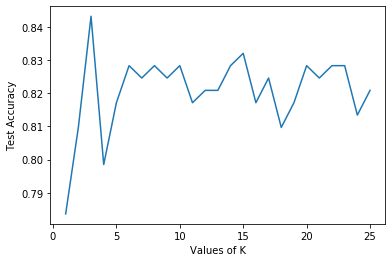

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
#scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
print(np.argmax(scores_list))
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Values of K')
plt.ylabel('Test Accuracy')

In [131]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred = knn.predict(test)
submission['Survived'] = y_pred
# del submission['survived']

In [132]:
submission.to_csv('submit_file.csv', index = False)

In [133]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
#Accuracy only 62%

### Analysing Data and Modifying 

In [31]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train  = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


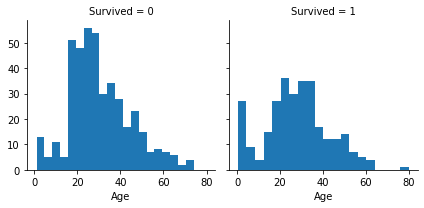

In [32]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

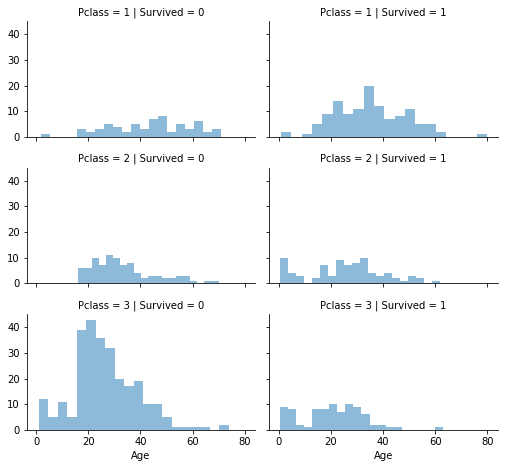

In [33]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

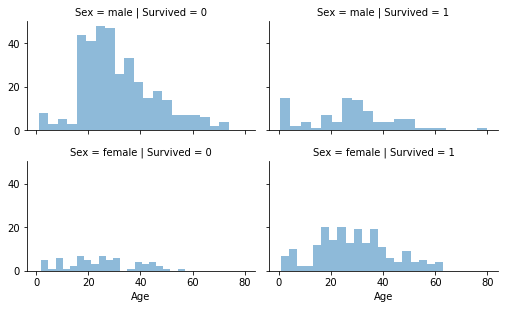

In [34]:
grid = sns.FacetGrid(train, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/dristiron/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/dristiron/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


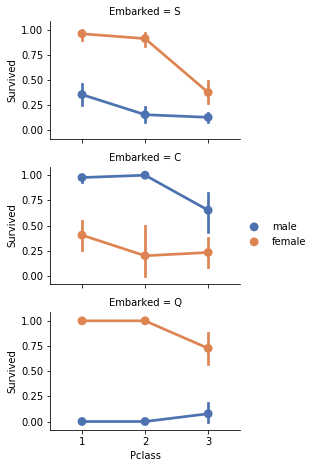

In [36]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/dristiron/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


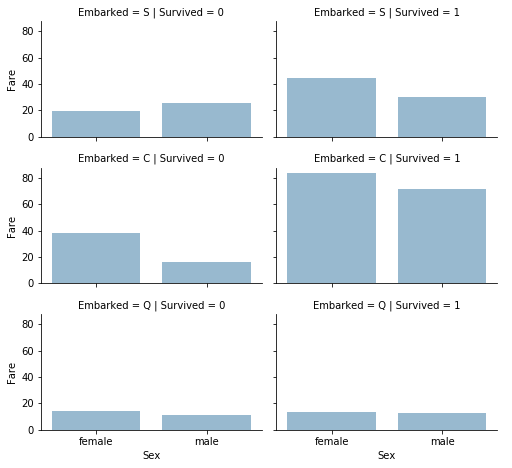

In [38]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()